In [2]:
#!pip install graphviz
#!pip install folim
import pandas as pd

# Load the data from a CSV file
data = pd.read_csv('pas_data_ward_level/PAS_ward_level_FY_20_21.csv', low_memory=False)
data.rename(columns = {'ward':'GSS_CODE'}, inplace = True)
#gdf = gpd.read_file("Counties/CTYUA_DEC_2023_UK_BFC.shp")
#display(gdf)

display(data)

#Renaming for compatibility between dataframes
gdf['CTYUA23NM'] = gdf['CTYUA23NM'].str.replace(' and ', ' & ', regex=False)
gdf['CTYUA23NM'] = gdf['CTYUA23NM'].str.replace('Richmond upon Thames', 'Richmond Upon Thames', regex=False)

,Unnamed: 0,Week,interview_date,Quarter1.1,Quarter,MONTH,FinancialYear,BCU,Borough,Q1,...,WT_Q64,WT_Q64_B,WT_Q64_E,WT_Discrete,WT_Discrete_rebased,ReXQ135,ReQ136,ReNQ147,ReQ150,ReQ139
0,1,01/04/2020-05/04/2020,1.380534e+10,61,61 Quarter 1 2020/21,109 (Apr 2020),16,BCU11,Barking & Dagenham,3 years but less than 5 years,...,NaN,3.147059,3.147059,3.192990,3.143867,Male,25 to 34,White British,Heterosexual,Full time (31+ hours per week)
1,2,01/04/2020-05/04/2020,1.380516e+10,61,61 Quarter 1 2020/21,109 (Apr 2020),16,BCU10,Barnet,30 years or more,...,NaN,0.781933,0.781933,0.793345,0.781140,Female,55 to 64,Black,Heterosexual,Full time (31+ hours per week)
2,3,01/04/2020-05/04/2020,1.380508e+10,61,61 Quarter 1 2020/21,109 (Apr 2020),16,BCU10,Barnet,30 years or more,...,NaN,1.398138,1.398138,1.418544,1.396720,Male,65+,Other,"Non-Heterosexual (Gay, Lesbian, Bisexual, None...",Retired
3,4,01/04/2020-05/04/2020,1.380516e+10,61,61 Quarter 1 2020/21,109 (Apr 2020),16,BCU5,Bexley,10 years but less than 20 years,...,NaN,4.097724,4.097724,4.157529,4.093567,Female,55 to 64,White Other,Heterosexual,Full time (31+ hours per week)
4,5,01/04/2020-05/04/2020,1.380525e+10,61,61 Quarter 1 2020/21,109 (Apr 2020),16,BCU10,Brent,10 years but less than 20 years,...,NaN,1.778367,1.778367,1.804322,1.776563,Female,16 to 24,Asian,Refused,Student/full time education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12731,12732,22/03/2021-28/03/2021,1.383610e+10,64,64 Quarter 4 2020/21,120 (Mar 2021),16,BCU1,Kensington & Chelsea,20 years but less than 30 years,...,0.155314,0.165836,0.165836,0.155314,0.165668,Male,35 to 44,Other,Heterosexual,Full time (31+ hours per week)
12732,12733,22/03/2021-28/03/2021,1.383610e+10,64,64 Quarter 4 2020/21,120 (Mar 2021),16,BCU1,Kensington & Chelsea,10 years but less than 20 years,...,0.363910,0.388565,0.388565,0.363910,0.388170,Female,25 to 34,Black,Heterosexual,Full time (31+ hours per week)
12733,12734,22/03/2021-28/03/2021,1.383618e+10,64,64 Quarter 4 2020/21,120 (Mar 2021),16,BCU9,Newham,5 years but less than 10 years,...,1.524774,1.628077,1.628077,1.524774,1.626426,Female,35 to 44,Black,Heterosexual,Full time (31+ hours per week)
12734,12735,22/03/2021-28/03/2021,1.383610e+10,64,64 Quarter 4 2020/21,120 (Mar 2021),16,BCU1,Kensington & Chelsea,20 years but less than 30 years,...,0.320513,0.342228,0.342228,0.320513,0.341881,Female,45 to 54,Mixed,Heterosexual,Full time (31+ hours per week)


NameError: name 'gdf' is not defined

In [129]:
columns_to_extract = ['Q1', 'Q13', 'ReQ150', 'ReQ139', 'ReQ136', 'ReXQ135', 'ward_n', 'GSS_CODE', 'Borough']

# Extract these columns into a new DataFrame
extracted_df = data[columns_to_extract]

q13_mapping = {
    'Very worried': 1,
    'Fairly worried': 2,
    'Not very worried': 3,
    'Not at all worried': 4,
    'Don’t know': 97,'Refused': 98}

# Mapping for column Q1
q1_mapping = {
    'Less than 12 months': 1,
    '12 months but less than 2 years': 2,
    '2 years but less than 3 years': 3,
    '3 years but less than 5 years': 4,
    '5 years but less than 10 years': 5,
    '10 years but less than 20 years': 6,
    '20 years but less than 30 years': 7,
    '30 years or more': 8,
    'Don’t know': 97,
    'Refused': 98
}

# Replace the string values with their numerical codes
extracted_df['Q13'] = extracted_df['Q13'].replace(q13_mapping)
extracted_df['Q1'] = extracted_df['Q1'].replace(q1_mapping)

display(extracted_df)

het = extracted_df[extracted_df['ReQ150'] == "Heterosexual"]
nonhet = extracted_df[extracted_df['ReQ150'] != "Heterosexual"]

male = extracted_df[extracted_df['ReXQ135'] == "Male"]
female = extracted_df[extracted_df['ReXQ135'] == "Female"]


C:\Users\20211424\AppData\Local\Temp\ipykernel_4388\1823496014.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Q13'] = extracted_df['Q13'].replace(q13_mapping)
C:\Users\20211424\AppData\Local\Temp\ipykernel_4388\1823496014.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Q1'] = extracted_df['Q1'].replace(q1_mapping)


,Q1,Q13,ReQ150,ReQ139,ReQ136,ReXQ135,ward_n,GSS_CODE,Borough
0,4.0,3.0,Heterosexual,Full time (31+ hours per week),25 to 34,Male,Valence ...,E05000040,Barking & Dagenham
1,8.0,3.0,Heterosexual,Full time (31+ hours per week),55 to 64,Female,Burnt Oak ...,E05000044,Barnet
2,8.0,3.0,"Non-Heterosexual (Gay, Lesbian, Bisexual, None...",Retired,65+,Male,Mill Hill ...,E05000057,Barnet
3,6.0,3.0,Heterosexual,Full time (31+ hours per week),55 to 64,Female,Belvedere ...,E05011218,Bexley
4,6.0,2.0,Refused,Student/full time education,16 to 24,Female,Sudbury ...,E05000101,Brent
...,...,...,...,...,...,...,...,...,...
12731,7.0,2.0,Heterosexual,Full time (31+ hours per week),35 to 44,Male,Pembridge ...,E05009400,Kensington & Chelsea
12732,6.0,4.0,Heterosexual,Full time (31+ hours per week),25 to 34,Female,Golborne ...,E05009396,Kensington & Chelsea
12733,5.0,1.0,Heterosexual,Full time (31+ hours per week),35 to 44,Female,Stratford and New Town ...,E05000492,Newham
12734,7.0,3.0,Heterosexual,Full time (31+ hours per week),45 to 54,Female,St. Helen's ...,E05009404,Kensington & Chelsea


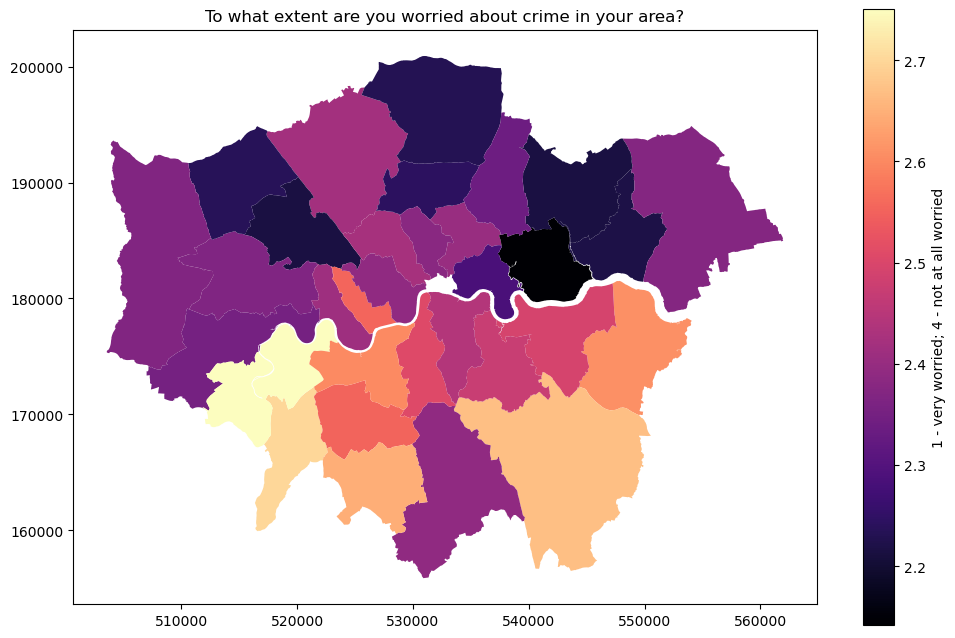

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

average_q13_by_ward = extracted_df.groupby('Borough')['Q13'].mean().reset_index()
merged = gdf.merge(average_q13_by_ward, left_on='CTYUA23NM', right_on='Borough')

#display(merged)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Q13', ax=ax, legend=True,
                legend_kwds={'label': "1 - very worried; 4 - not at all worried"}, cmap='magma')
plt.title(f'To what extent are you worried about crime in your area?')
plt.show()


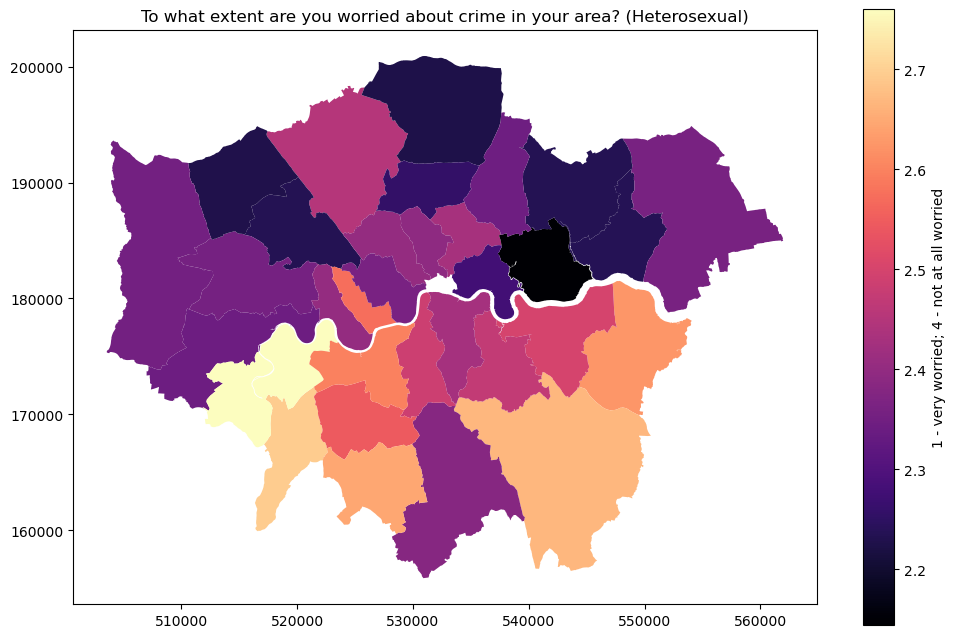

In [126]:
average_q13_by_ward = het.groupby('Borough')['Q13'].mean().reset_index()
merged = gdf.merge(average_q13_by_ward, left_on='CTYUA23NM', right_on='Borough')

#display(merged)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Q13', ax=ax, legend=True,
                legend_kwds={'label': "1 - very worried; 4 - not at all worried"}, cmap='magma')
plt.title(f'To what extent are you worried about crime in your area? (Heterosexual)')
plt.show()

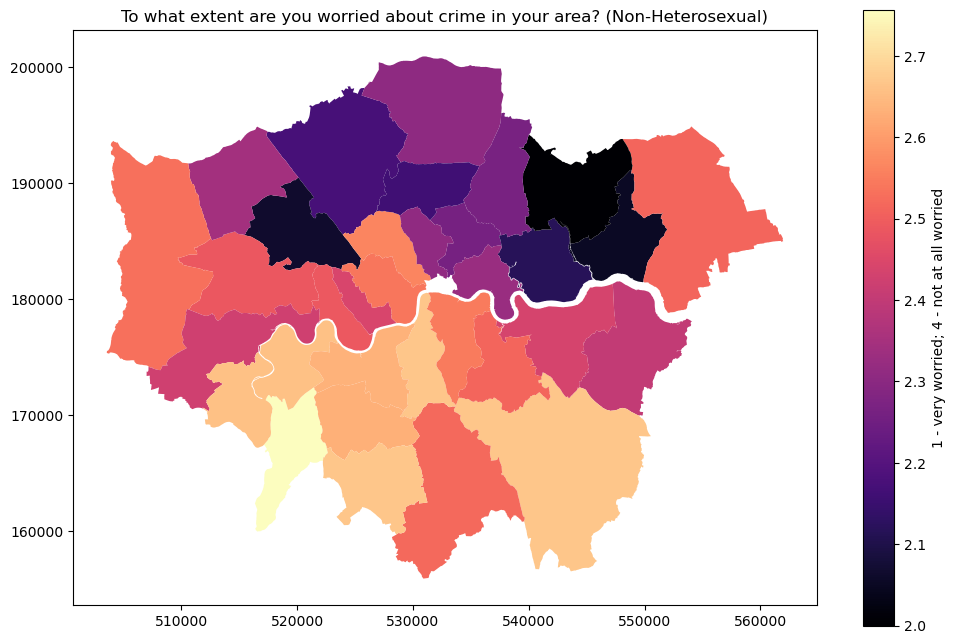

In [125]:
average_q13_by_ward = nonhet.groupby('Borough')['Q13'].mean().reset_index()
merged = gdf.merge(average_q13_by_ward, left_on='CTYUA23NM', right_on='Borough')

#display(merged)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Q13', ax=ax, legend=True,
                legend_kwds={'label': "1 - very worried; 4 - not at all worried"}, cmap='magma')
plt.title(f'To what extent are you worried about crime in your area? (Non-Heterosexual)')
plt.show()

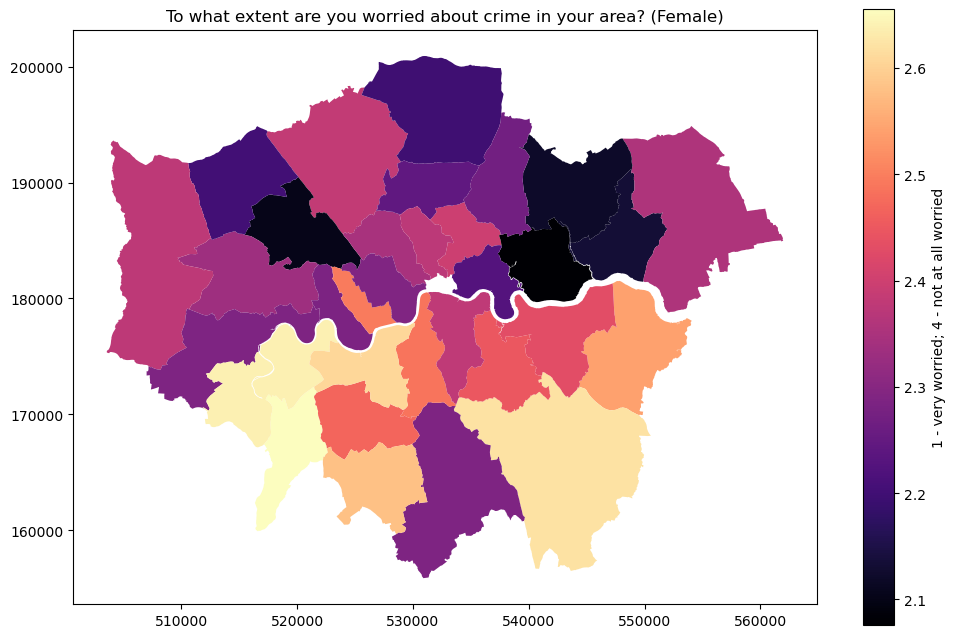

In [130]:
average_q13_by_ward = female.groupby('Borough')['Q13'].mean().reset_index()
merged = gdf.merge(average_q13_by_ward, left_on='CTYUA23NM', right_on='Borough')

#display(merged)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Q13', ax=ax, legend=True,
                legend_kwds={'label': "1 - very worried; 4 - not at all worried"}, cmap='magma')
plt.title(f'To what extent are you worried about crime in your area? (Female)')
plt.show()

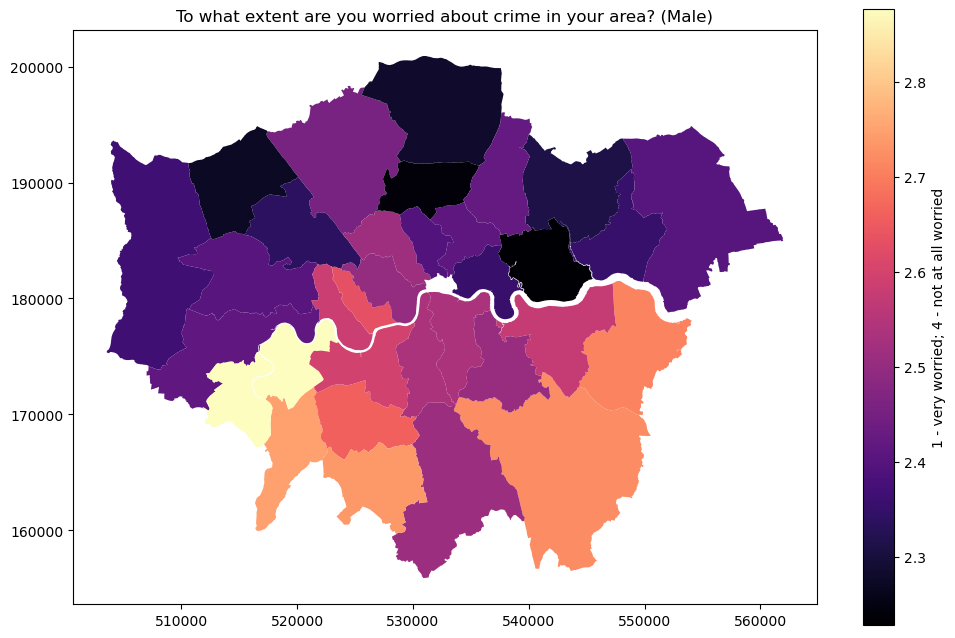

In [131]:
average_q13_by_ward = male.groupby('Borough')['Q13'].mean().reset_index()
merged = gdf.merge(average_q13_by_ward, left_on='CTYUA23NM', right_on='Borough')

#display(merged)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Q13', ax=ax, legend=True,
                legend_kwds={'label': "1 - very worried; 4 - not at all worried"}, cmap='magma')
plt.title(f'To what extent are you worried about crime in your area? (Male)')
plt.show()

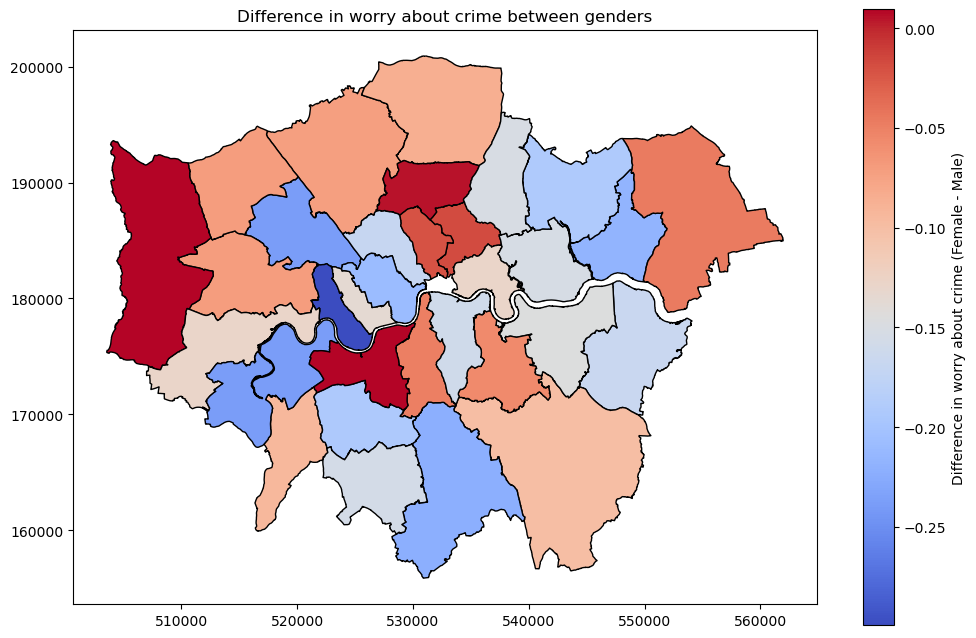

In [132]:
average_q13_male = male.groupby('Borough')['Q13'].mean().reset_index()
average_q13_female = female.groupby('Borough')['Q13'].mean().reset_index()

# Merge these averages back with the geographical dataframe
merged_male = gdf.merge(average_q13_male, left_on='CTYUA23NM', right_on='Borough')
merged_female = gdf.merge(average_q13_female, left_on='CTYUA23NM', right_on='Borough')

# Calculate the difference between female and male Q13 averages
merged_male['difference'] = merged_female['Q13'] - merged_male['Q13']

# Plotting the difference
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_male.plot(column='difference', ax=ax, legend=True, 
                 legend_kwds={'label': "Difference in worry about crime (Female - Male)"},
                 cmap='coolwarm', edgecolor='black')
plt.title('Difference in worry about crime between genders')
plt.show()

#value of 0 (red) means no difference in perception
#blue means more danger according to men

In [1]:
MOPAC_q_numbers = ["NQ3a", "NQ4", "NQ5", "NQ6a", "NQ6b", "Q5", "TQ4b", "PQ6c", "Q6c", "SQ6C", "SQ6D", "Q7", "PQ14", "Q10",
    "Q12", "Q17", "Q18d", "PQ18e", "Q18e", "Q18c", "NNQ18A", "NQ18b", "NNQ18b1", "NNQ18b2", "NNQ18b3", "NQ18d",
    "NQ18c", "NQ18l", "Q18k", "Q19a", "NQ19b", "Q21", "NQ21", "NQ23a", "PQ23a", "PQ23b", "PQ23c", "NQ23b", "NQ24",
    "Q28", "Q27", "Q29", "Q34a", "Q34d", "Q34c", "Q35", "Q36", "NQ37A", "NQ36", "PQ36d", "PQ36e", "PQ36f", "Q38",
    "Q39", "Q40", "Q42A", "Q42B", "Q48a", "RQ50b", "RQ50c", "Q49a", "Q49b", "Q49c", "Q49d", "Q49e", "Q52a", "Q52b",
    "Q53", "Q51a"]

PAS_q_numbers = ["Q1", "Q3L", "Q13", "Q15", "Q20", "Q21", "NQ22", "NQ23", "Q37", "Q39A_2", "Q39B", "NQ43", "NQ44A", "NQ44B", "NQ49B",
    "NQ49C", "ZQ10E", "Q58", "Q59", "NQ24", "NQ24B", "Q60", "Q61", "Q62A", "Q62B", "Q62C", "Q62F", "Q62TG", "Q65", "Q196A",
    "A120A", "A121", "NQ139A", "NQ139B", "XQ128A", "XQ128C", "XQ128D", "XQ128E", "XQ128F", "XQ128AA", "Q79J", "XQ21A", "XQ21G",
    "Q79G", "NQ197", "XQ128AB", "NQ135BD", "NQ135BDB", "NQ135BDD", "NQ135BDE", "NQ135BE", "NQ135BF", "NQ135BG", "NQ62B",
    "NQ62C", "NQ62D", "NQ135BH", "XQ122A", "XQ122B", "V1", "V2", "V3", "V4", "V5", "C1_V6", "C1_V7", "C1_V8", "C1_V9", "C1_V10",
    "C1_V11", "C1_V12", "C1_V13", "C1_V14", "Q131", "Q133", "RQ80E", "NQ133A", "NPQ135A", "NNQ135A", "XNQ135C", "XNQ135B",
    "NQ198A", "NQ198B", "Q62D", "Q62E", "Q62H", "Q62TI", "Q62TJ", "ZQ10A", "ZQ10B", "ZQ10D", "ZQ10F", "ZQ10I", "ZQ10J", "XQ128AC",
    "XQ128AD", "XQ128AE", "XQ59C", "XQ59D", "Q79I", "Q79B", "Q79D", "Q79E", "Q79K", "Q79L", "Q79M", "NQ65A", "Q194", "Q195A",
    "Q195B", "Q195C", "Q196B", "Q196C", "SQ80D", "Q144", "Q139", "NNQ147", "Q148", "Q150", "Q143", "NQ143"]

TDIU_q_numbers = ["Q5a", "Q5b", "Q5c", "Q6", "Q7", "Q8", "Q9", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", 
    "Q17a", "Q17b", "Q17c", "Q17d", "Q18", "Q19", "Q20", "Q21", "Q22", "Q23a", "Q23b", "Q23c",
    "Q24", "Q25", "Q26", "Q27", "Q28", "Q29", "Q30", "Q31", "Q32", "Q33a", "Q33b", "Q34", "Q35",
    "Q36", "Q37"]


In [117]:
from graphviz import Digraph

# Initialize Digraph object
dot = Digraph(comment='MOPAC TDIU Survey 2021/2022')

# Adding nodes for each key question and branches
# We focus on "Online" and "Telephone" survey paths

# Nodes for Online Survey Path
dot.node('Q2', 'Q2: Did you answer Online?')
dot.node('Q5a', 'Q5a: Further police contact after online report?')
dot.node('Q5b', 'Q5b: Expect further contact?')
dot.node('Q5c', 'Q5c: Tried other contact methods?')
dot.node('Q6', 'Q6: During reporting process...')
dot.node('Q7', 'Q7: Aware of Victims Code?')

# Nodes for Telephone Survey Path
dot.node('Q17a', 'Q17a: Incident dealt over the phone?')
dot.node('Q17b', 'Q17b: Content with phone handling?')
dot.node('Q17c', 'Q17c: Transferred to TDIU?')
dot.node('Q17d', 'Q17d: Wait for call back?')
dot.node('Q18', 'Q18: During reporting process...')

# Edges for Online Survey Path
dot.edge('Q2', 'Q5a', label='Online')
dot.edge('Q5a', 'Q6', label='Yes')
dot.edge('Q5a', 'Q5b', label='No')
dot.edge('Q5a', 'Q6', label='Don\'t know')
dot.edge('Q2', 'Q5c', label='Online')

# Edges for Telephone Survey Path
dot.edge('Q2', 'Q17a', label='Telephone')
dot.edge('Q17a', 'Q17b', label='Entirely over the phone')
dot.edge('Q17a', 'Q18', label='Visit at home')
dot.edge('Q17a', 'Q18', label='Don\'t know/can\'t remember')
dot.edge('Q17c', 'Q18', label='Transferred directly')
dot.edge('Q17c', 'Q17d', label='Wait for callback')
dot.edge('Q17c', 'Q18', label='Don\'t know/can\'t remember')

# Render the graph to a file and open it
dot.render('survey_flowchart', view=True)

'survey_flowchart.pdf'

In [134]:
dot = Digraph(comment='MOPAC User Satisfaction Survey')

# Add nodes representing each significant survey question
dot.node('Q5', 'Q5: Initial Contact Method')
dot.node('TQ4b', 'TQ4b: Police Contact Desired?')
dot.node('PQ6c', 'PQ6c: Wait Time on Call')
dot.node('Q6c', 'Q6c: Wait Time at Station')
dot.node('SQ6C', 'SQ6C: Attempted Other Contact Methods')
dot.node('SQ6D', 'SQ6D: First Contact Method Tried')
dot.node('Q7', 'Q7: Satisfaction with Contact Ease')
dot.node('Q10', 'Q10: Informed of Response Time')
dot.node('Q12', 'Q12: Follow Up Calls')
dot.node('Q17', 'Q17: Satisfaction with Police Arrival Time')
dot.node('Q18d', 'Q18d: Scene Investigation')
dot.node('Q19a', 'Q19a: Reassurance by Police Actions')
dot.node('Q21', 'Q21: Satisfaction with Police Actions')

# Adding edges based on the survey logic, focusing on key parts of the flow
dot.edge('Q5', 'TQ4b', label='Someone else contacted')
dot.edge('Q5', 'PQ6c', label='101 number used')
dot.edge('Q5', 'Q6c', label='Visited police station')
dot.edge('Q5', 'SQ6C', label='Other contact methods')
dot.edge('SQ6C', 'SQ6D', label='Yes')
dot.edge('SQ6D', 'Q7')
dot.edge('Q5', 'Q7', label='Direct paths')
dot.edge('Q7', 'Q10', label='Moving to police response')
dot.edge('Q10', 'Q12')
dot.edge('Q12', 'Q17')
dot.edge('Q17', 'Q18d', label='Following to incident response')
dot.edge('Q18d', 'Q19a')
dot.edge('Q19a', 'Q21')

# Render the graph to a file and view it
dot.render('survey_flow.gv', view=True)

'survey_flow.gv.pdf'